<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sulat\AppData\Local\Temp\ipykernel_19380\4046009908.py:17: SyntaxWarning: invalid escape sequence '\s'
  data['review'] = data['review'].str.lower().str.replace('[^a-z\s]', '', regex=True)


Accuracy: 0.9490067261066791
Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      1.00      0.97      5937
    Positive       0.92      0.31      0.47       456

    accuracy                           0.95      6393
   macro avg       0.93      0.66      0.72      6393
weighted avg       0.95      0.95      0.94      6393



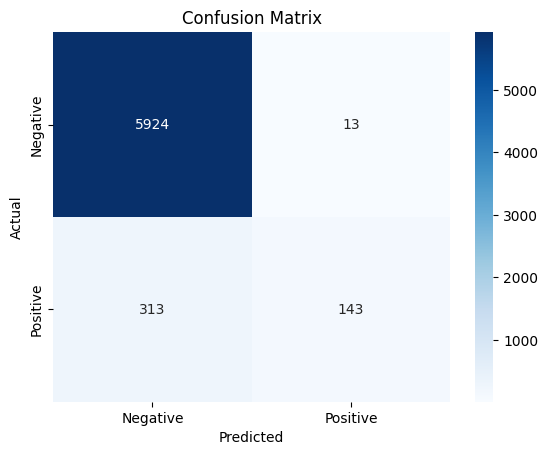

In [1]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset (You can use any dataset with 'review' and 'sentiment' columns)
# Example: Using a sample sentiment dataset
data = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv")
data = data[['label', 'tweet']]
data.columns = ['sentiment', 'review']

# Step 3: Preprocessing
data['review'] = data['review'].str.lower().str.replace('[^a-z\s]', '', regex=True)
data['sentiment'] = data['sentiment'].map({0: 'Negative', 1: 'Positive'})

# Step 4: Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(data['review'])
y = data['sentiment']

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
